# Unit 5: Simulation of sampling of tiles 

### (sampling with replacement)


This is also a simulation for rolling six-sided dice.

The function we define here in the notebook ___sample_from_population___ is a numerical simulator for drawing randomly from the bag of tiles. The sample size ___n___ can be provided to the function as an argument, and the keyword parameter loaded can be set to either ___True___ or ___False___. See also ___help(sample_from_population)___ for help on how to use the function.

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 20 14:10:29 2017

@author: OET
"""
import numpy as np
def sample_from_population(n, loaded=False):
    """This function will simulate the tile sampling experiment.
    You can also think of it as simulator for rolling a 6-sided.
    
    Parameters:
    -----------
    n: int
           the number of times to draw a tile from the population (or roll the die)
    loaded: bool, optional 
            (False is default, creating uniform probability for all events)           
    Returns:
    --------
    numpy array
        a numpy array with the event numbers
           
    Examples:
    ---------
    res = roll_dice(30)
    
        create a sample of size 30 with equal probability (fair population)
    
    res= roll_dice(100,loaded=True)
        
        create a sample of size 100 with uneven probability (population ith one numbern showing up with lower probability than the others):
        
    Last Update: 2023-03-01 by OET"""
           
    if loaded==True:
        # loaded dice simulation / tile population with one event having lower probability
        population = np.array([1,1,1,1,1,1,\
                               2,2,2,2,2,2,\
                               3,3,3,3,3,3,\
                               4,4,4,        \
                               5,5,5,5,5,5,\
                               6,6,6,6,6,6]) 
    else:
        # fair dice simulation / tile population with uniform (even) probability
        population = np.array([1,1,1,1,1,1,\
                               2,2,2,2,2,2,\
                               3,3,3,3,3,3,\
                               4,4,4,4,4,4,\
                               5,5,5,5,5,5,\
                               6,6,6,6,6,6]) 
    #return events
    return population[np.random.randint(0,np.size(population),size=n)]


In [9]:
help(sample_from_population)

Help on function sample_from_population in module __main__:

sample_from_population(n, loaded=False)
    This function will simulate the tile sampling experiment.
    You can also think of it as simulator for rolling a 6-sided.
    
    Parameters:
    -----------
    n: int
           the number of times to draw a tile from the population (or roll the die)
    loaded: bool, optional 
            (False is default, creating uniform probability for all events)           
    Returns:
    --------
    numpy array
        a numpy array with the event numbers
           
    Examples:
    ---------
    res = roll_dice(30)
    
        create a sample of size 30 with equal probability (fair population)
    
    res= roll_dice(100,loaded=True)
        
        create a sample of size 100 with uneven probability (population ith one numbern showing up with lower probability than the others):
        
    Last Update: 2023-03-01 by OET



In [10]:
#  30 trials sampling from the population of tiles / 30 times rolling a 6-sided die 
events=np.array([1,2,3,4,5,6])
n=25
nexperiments=100

nevents=len(events)
hist_fair=np.zeros(shape=[nexperiments,nevents])
hist_loaded=np.zeros(shape=[nexperiments,nevents])
for i in range(nexperiments):
    # store the summary result from one experiment
    yfair=sample_from_population(n,loaded=False)
    yloaded=sample_from_population(n,loaded=True)
    # bin ranges
    use_bins=np.arange(0.5,6.5+1,1) # [0.5, 1.5, ... ,6.5]
    count_fair,index=np.histogram(yfair,bins=use_bins)
    count_loaded,index=np.histogram(yloaded,bins=use_bins)
    hist_fair[i,:]=count_fair/n # relative freq
    hist_loaded[i,:]=count_loaded/n # relative freq



In [11]:
# Summary of the Monte_Carlo simulations
hist_fair_mean=np.mean(hist_fair,axis=0)
hist_loaded_mean=np.mean(hist_loaded,axis=0)

### Show one example of the sample histograms 

Samples were drawn from tile populations: one with a with 'fair' and the other with a 'loaded'
population. By the terms 'fair' we mean that the probability the tile showing a number, for example '1' is that same as for any of the other tile numbers. For a 'loaded' tile population we have not equal probability for the events.

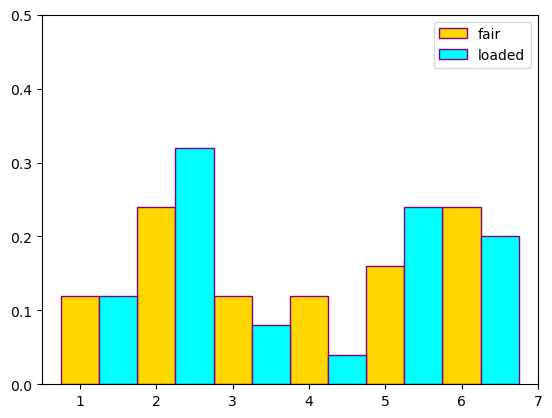

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(events,hist_fair[0,:],color="gold",edgecolor="purple",width=0.5,label='fair')
plt.bar(events+0.5,hist_loaded[0,:],color="cyan",edgecolor="purple",width=0.5,label='loaded')
plt.legend()
plt.ylim([0,0.5])
plt.xlim([0.5,7])
plt.show()

### Repeated simulation of the 'class' activity experiment

With Python we can simulate the sampling with replacement, many times. 
So, instead of just doing one experiment with drawing for example ___n___ (25) tiles, we can do this many more times, each time we save the results of the histogram calculation.
Then, we look at the average results. The average relative frequency for the six events is plotted for ___nexperiment___ (100) repetitions.

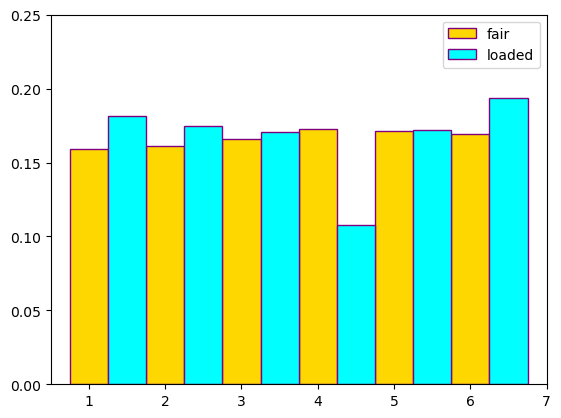

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(events,hist_fair_mean,color="gold",edgecolor="purple",width=0.5,label='fair')
plt.bar(events+0.5,hist_loaded_mean,color="cyan",edgecolor="purple",width=0.5,label='loaded')
plt.legend()
plt.ylim([0,0.25])
plt.xlim([0.5,7])
plt.show()

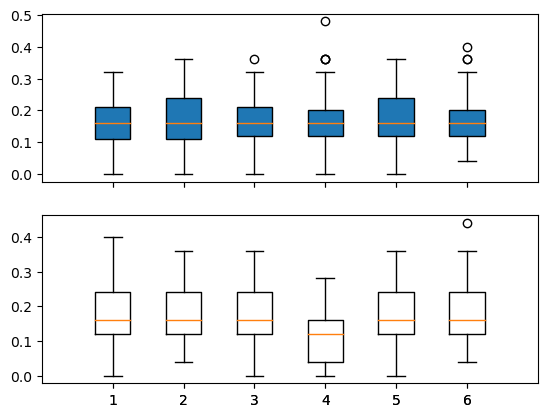

In [14]:
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].set_xlim([0,7])
values=[]
for i,e in enumerate(events):
    values.append(hist_fair[:,i])
ax[0].boxplot(values,patch_artist=True)
values=[]
for i,e in enumerate(events):
    values.append(hist_loaded[:,i])
ax[1].boxplot(values)  
fig.show()

---
## Optional learning activity 

### Individual tasks (10 minutes)

- 1. Explore the function *sample_from_population* and make sure you understand how the user can change between the two types of populations.
- 2. What variable fulfills the equivalent purpose that the envelope had in our real-world experiment?
- 3. Which line of code and how exactly do we simulate the physical process of randomly drawing a tile from the envelope?

### Team discussion: (5+10 minutes)

Discuss the answers to the previous questions and help each other to fully understand how the function code works. 

Next develop a strategy (for code development) for the following problem:
### How can you deploy this function to test systematically if your team has chosen a sample size (previous activity with the real tiles) that was 'sufficient' to answer if the population was 'loaded' or 'fair'? Sufficient means you were able to detect with high confidence the event (the tile) that had the lower probability in your population of tiles.


### Tip: 

- You want to repeat the whole experiment, as if we had 10, 20, or 1000 more days and each day we would repeat the sampling-with-replacement experiment with your chosen sample size (e.g. 30+20=50 trials). 
- You need an objective measure (metric) that allows you quantify your success rate! 
- Identify the important code structures that will be needed (loops, if-statement, lists, or arrays for data storage)  
---

(A written summary is recommended for this activity. However, it will not be graded this time, so this time each student is responsible to take their own notes!)
